# Приоретизация гипотез и анализ результатов А/В тестирования

<b>Проверка гипотез</b>

Цель иследования - проверить подготовленные гипотезы и проанализировать полученные результаты для увеличения выручки интернет-магазина.

План анализа


    1 - Приоритизация гипотез
    2 - Загрузка и обзор данных 
    3 - Анализ A/B-теста
    4 - Вывод

In [5]:
import pandas as pd
import numpy as np
from scipy import stats as st
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [6]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  
hyp = pd.read_csv('/hypothesis.csv')

hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### Рассмотрим сформулированные гипотезы

In [7]:
# Рассчитаем параметр ICE для приоритизации гипотез

hyp['ICE'] = (hyp['Impact']*hyp['Confidence']/hyp['Efforts']).round(2)
hyp[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending  = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [8]:
# Рассчитаем параметр RICE для приоритизации гипотез

hyp['RICE'] = hyp['Reach']*hyp['Impact']*hyp['Confidence']/hyp['Efforts'] 
hyp[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending  = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [9]:
cm = sns.light_palette("green", as_cmap=True)

s = hyp[['Hypothesis','ICE','RICE']].style.background_gradient(cmap=cm)
s


,Hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000,40.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000,4.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000


Как видно, при использовании фреймворка ICE первой гипотезой для проверки является гипотеза "Запустить акцию, дающую скидку на товар в день рождения", в то время как по параметру RICE она находится лишь на 5м месте. Это связано с очень низким показателем Reach этой гипотезы. При этом гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" имеют большие значения Reach и выходят по показателю RICE на первое и второе место. Нулевая гипотеза входит в тройку в обоих случаях. 

Гипотезы 

- 3 Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
- 1	Запустить собственную службу доставки, что сократит срок доставки заказов
- 5	Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
- 4	Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	

находятся в конце обоих списков.

#### Загрузка и обзор данных

Изучим полученные данные в таблицах orders и visitors

In [10]:
orders = pd.read_csv('/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders.duplicated().sum()

0

In [13]:
visitors = pd.read_csv('/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors.duplicated().sum()

0

В данных нет пропущенных значений и полных дубликатов. Формат данных можно оптимизировать для дальнейшего анализа.

In [16]:
# Произведем замену форматов данных

def mem_usage(data):
    usage_b = data.memory_usage(deep=True).sum()
    usage_mb = usage_b / 1024 ** 2 
    return usage_b.round(3)

# Функция замены формата данных и оптимизации числовых подформатов

def dtype_optim(data):
        
    dt_columns, obj_columns = ([],[])
    data_dt = data.drop(axis = 1, columns = data.columns)
    converted_dt = data.drop(axis = 1, columns = data.columns) 
    
# Преобразуем столбцы типа 'object' в числовой формат или формат datetime
    for column in data.columns:
        if data[column].dtype == 'object':
            try:
                data[column] = pd.to_numeric(data[column])
            except:
                data_dt = pd.concat([data_dt, data[column]], axis=1)
                try:
                    data[column] = pd.to_datetime(data[column], format = '%Y-%m-%d')
                    dt_columns.append(column)
                    converted_dt = pd.concat([converted_dt, data[column]], axis=1)
                except:
                    obj_columns.append(column)
                    pass
        pass
    
    data_dt = data_dt[converted_dt.columns]   
    
    data_int = data.select_dtypes(include=['int'])
    converted_int = data_int.apply(pd.to_numeric,downcast='integer')

    data_float = data.select_dtypes(include=['float'])
    converted_float = data_float.apply(pd.to_numeric,downcast='float')
    
    data.loc[:, data_int.columns] = converted_int
    data.loc[:, data_float.columns] = converted_float
    
    tot_mem_before = (mem_usage(data_int) + mem_usage(data_float) + mem_usage(data_dt)).round(3)
    tot_mem_after = (mem_usage(converted_int) + mem_usage(converted_float) + mem_usage(converted_dt)).round(3)
    reduced_int = (100*(1-mem_usage(converted_int)/ mem_usage(data_int))).round(3)
    reduced_float = (100*(1-mem_usage(converted_float)/ mem_usage(data_float))).round(3)
    reduced_total = (100*(1-tot_mem_after/tot_mem_before)).round(3)
    reduced_dt = (100*(1-mem_usage(converted_dt)/ mem_usage(data_dt))).round(3)

# Строим итоговую таблицу экономленной памяти
    mem_optimized = pd.DataFrame({'dtype' : ['int', 'float', 'datetime', 'total'], 
                                 'before, B' : [mem_usage(data_int), mem_usage(data_float), mem_usage(data_dt), tot_mem_before], 
                                 'after, B' : [mem_usage(converted_int), mem_usage(converted_float), mem_usage(converted_dt), tot_mem_after],
                                 'reduced, %' : [reduced_int, reduced_float, reduced_dt, reduced_total]})
    display(mem_optimized)
    display(data.info())

In [17]:
dtype_optim(orders)

,dtype,"before, B","after, B","reduced, %"
0,int,28856,24068,16.593
1,float,128,128,0.000
2,datetime,80327,9704,87.919
3,total,109311,33900,68.988


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int32         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 42.2+ KB


None

In [18]:
dtype_optim(visitors)

,dtype,"before, B","after, B","reduced, %"
0,int,624,252,59.615
1,float,128,128,0.000
2,datetime,4282,624,85.427
3,total,5034,1004,80.056


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 1.2+ KB


None

Получилось преобразовать данные в таблицах orders и visitors к нужному типу, а также сократить использование памяти на 69% и 80% соответственно.

#### Анализ данных A/B теста

In [19]:
# Создадим массив уникальных пар значений дат и групп теста

datesGroups = orders[['date', 'group']].drop_duplicates()

In [20]:
# Расчитаем агрегированные кумулятивные по дням данные о заказах и клиентах

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [22]:
# Объединим кумулятивные данные в одной таблице

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [23]:
# Выделим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах А и В

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

##### Анализ изменения конверсии и среднего чека по группам

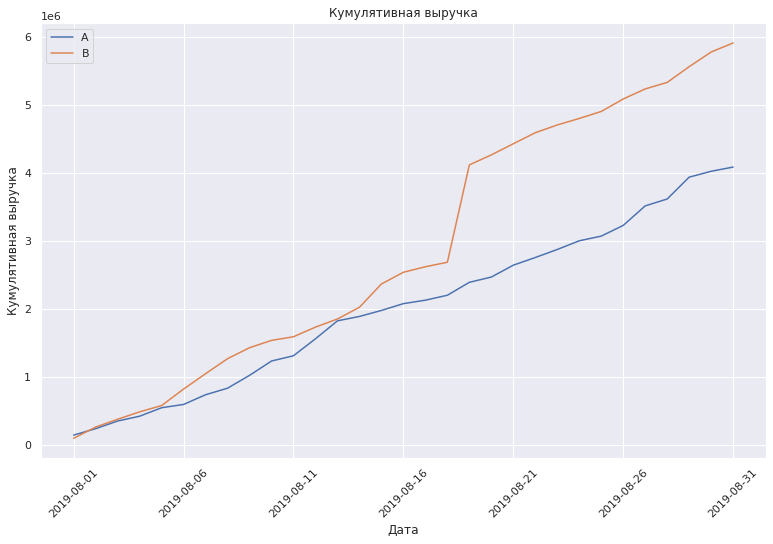

In [25]:
# Поcтроим график кумулятивной выручки по группам

plt.figure(figsize=(13,8))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.title('Кумулятивная выручка')
plt.legend()
plt.xticks(cumulativeRevenueA['date'][::5],  rotation=45)
plt.show()

На графике хорошо видно, что кумулятивные выручки вариантов А и В почти одинаковы в первую неделю эксперимента, начинают расходиться в течении второй недели. В районе 18-го августа произошло резкое значительное увеличение выручки варианта В, после чего графики продолжают идти почти параллельно.

Вероятно, 18-го августа было разовое воздействие, сказавшееся только на тестовую группу. Итоговые значения выручки в группах различаются почти на 2млн.р.

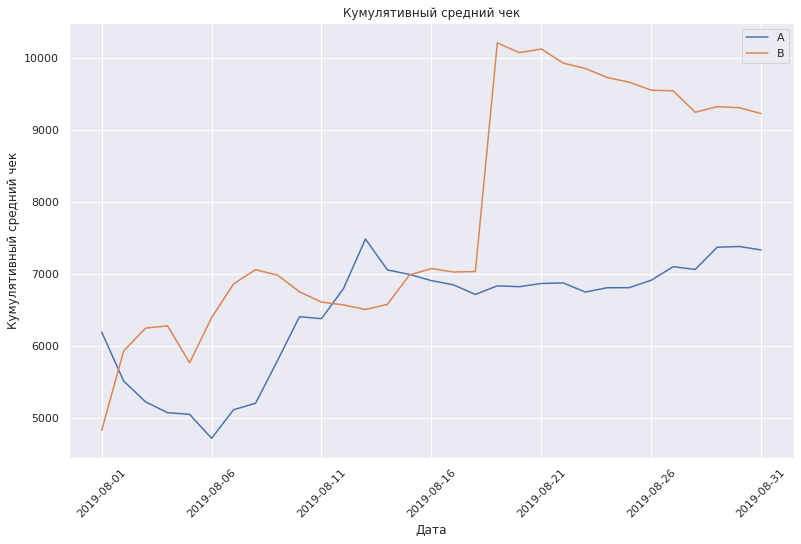

In [26]:
# Построим графики кумулятивного среднего чека по группам

plt.figure(figsize=(13,8))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.title('Кумулятивный средний чек')
plt.legend()
plt.xticks(cumulativeRevenueA['date'][::5],  rotation=45)
plt.show()

На графике кумулятивного среднего чека в двух группах также отчетливо видно воздействие, произошедшее 18-го августа, преведшее к значительному увеличению и этого показателя в группе В. После этой даты графики начинают сходиться, что свидетельствует о кратковременном характере этого воздействия.
Группа В показывает значительно большее итоговое значение.

In [27]:
# Построим график относительного изменения кумулятивного среднего чека группы B к группе A

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


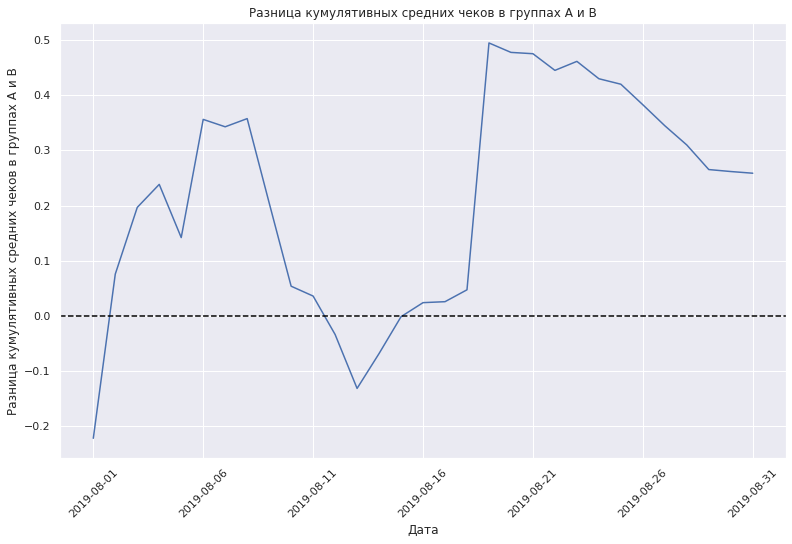

In [28]:
plt.figure(figsize=(13,8))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Разница кумулятивных средних чеков в группах А и В')
plt.title('Разница кумулятивных средних чеков в группах А и В')
plt.xticks(mergedCumulativeRevenue['date'][::5],  rotation=45)
plt.show()


На графике хорошо видно, что группа В на протяжении значительного времени имеет больший средний чек.

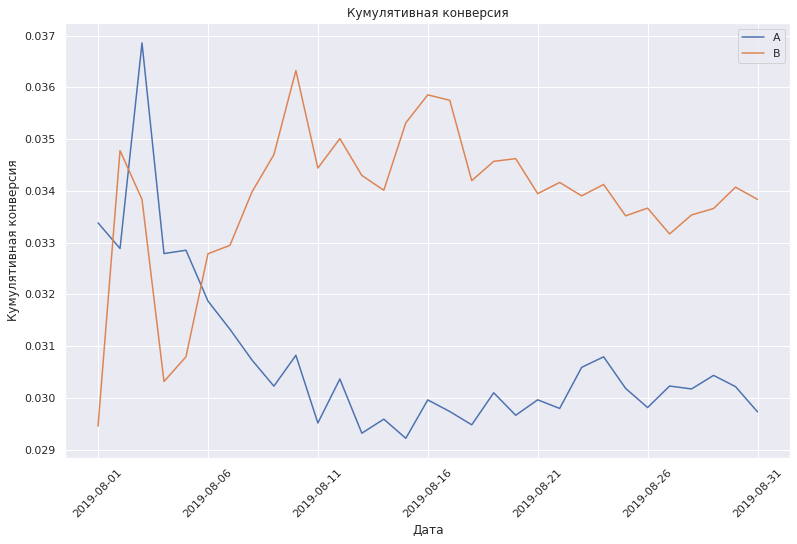

In [29]:
# Построим график кумулятивной конверсии по группам

cumulativeData['conversion'] = (cumulativeData['orders'] / cumulativeData['visitors'])

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize=(13,8))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.title('Кумулятивная конверсия')
plt.xticks(mergedCumulativeRevenue['date'][::5],  rotation=45)
plt.legend()
plt.show()

График кумулятивной конверсии показывает что в первые дни накопления данных, значения конверсии колебались, а с 6-го дня отчетливо виден тренд расхождения линий групп А и В. Конверсия группы В после 10-го дня эксперимента достигает максимума и плавно снижается к концу месяца. При этом различие между группами остается существенным.

Стоит отметить, что мы не наблюдаем никаких значительных изменений на графике 18-го числа, что говорит нам о характере того воздействия. Люди в этот день стали покупать более дорогие товары или большее их количество, но количество клиентов, совершивших покупку осталось прежним.

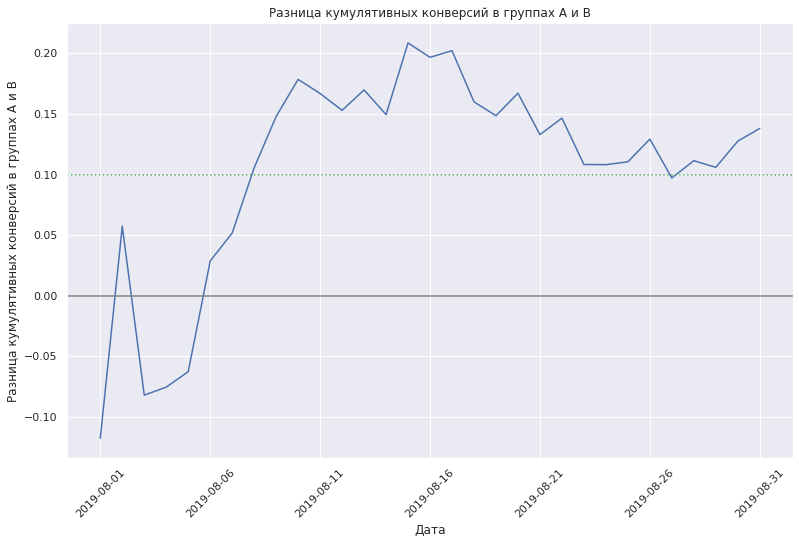

In [30]:
# Построим график относительного изменения кумулятивной конверсии группы B к группе A

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.figure(figsize=(13,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.xlabel('Дата')
plt.ylabel('Разница кумулятивных конверсий в группах А и В')
plt.title('Разница кумулятивных конверсий в группах А и В')
plt.axhline(y=0, color='grey', linestyle='-')
plt.axhline(y=0.1, color='g', linestyle=':')

plt.xticks(mergedCumulativeRevenue['date'][::5],  rotation=45)

plt.show()

На графике видно превосходство конверсии варианта В над вариантом А. Максимальное значение относительного изменения конверсии равно 0.2
К концу эксперимента оно равно 0.13

##### Выявление аномальных значений в данных

In [31]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [32]:
# Подсчитаем количество заказов по по пользователям

ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

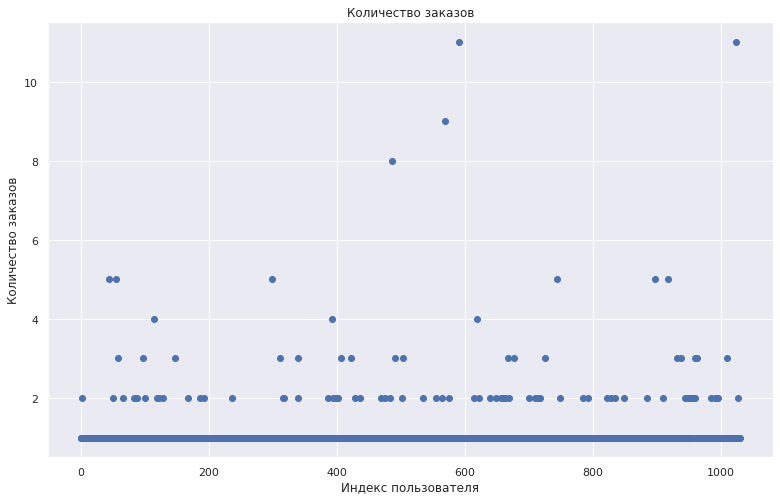

In [33]:
# Построим график распределения количества заказов по пользователям

x = np.arange(0, len(ordersByUsers), 1)

plt.figure(figsize=(13,8))
plt.xlabel('Индекс пользователя')
plt.ylabel('Количество заказов')
plt.title('Количество заказов')
plt.scatter(x, ordersByUsers['orders']) 

plt.show()

Наибольшее число людей совершают одну покупку, однако есть пользователи, купившие 8,9 и даже 11 раз

In [34]:
# Посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя

print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


1% покупателей совершили 4 и более покупок. Принимая во внимание график распределения числа покупок, этот уровень выглядит оптимальным для определения аномальных пользователей 

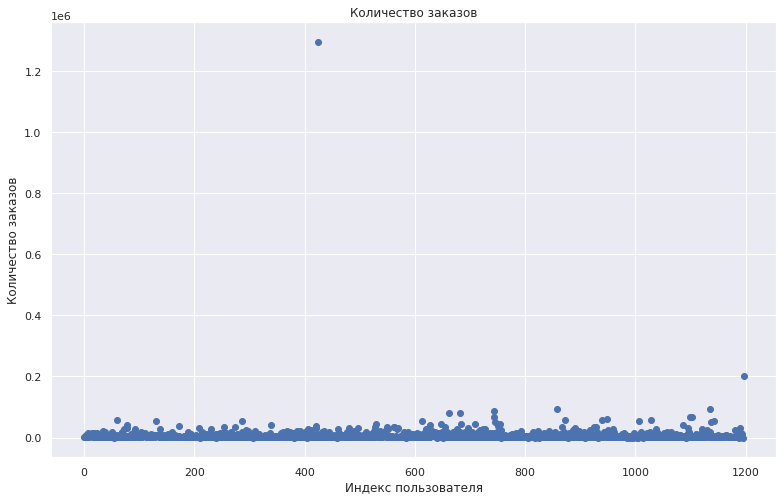

In [35]:
# Построим точечный график стоимостей заказов

x = np.arange(0, len(orders['revenue']), 1)

plt.figure(figsize=(13,8))
plt.xlabel('Индекс пользователя')
plt.ylabel('Количество заказов')
plt.title('Количество заказов')
plt.scatter(x, orders['revenue']) 

plt.show()

На графике хорошо видно, что подавляющее больоинство чеков не выходит за границу 200000р. Только одна точка в районе 1300000р. резко выбивается из картины. Построим график без нее для более детального анализа. 

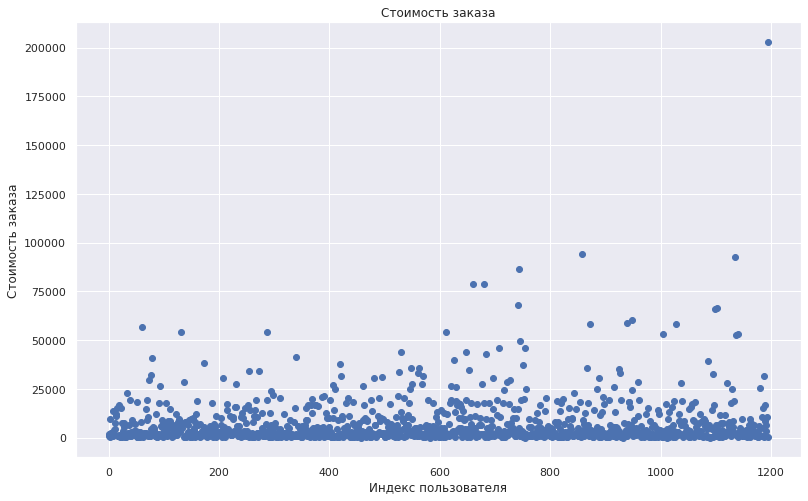

In [36]:
orders_filtered = orders[orders['revenue']<1000000]

x = np.arange(0, len(orders_filtered['revenue']), 1)

plt.figure(figsize=(13,8))
plt.xlabel('Индекс пользователя')
plt.ylabel('Стоимость заказа')
plt.title('Стоимость заказа')
plt.scatter(x, orders_filtered['revenue']) 

plt.show()

Теперь лучше видно распределение стоимости покупок. Большинство не превышает нескольки тысяч рублей.

In [37]:
# Посчитаем 95-й и 99-й перцентили стоимости заказов

print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Стоимость 95% заказов не превышает 28000р, а 1% самых дорогих покупок стоят больше 58233.2р
Принимая во внимание график распределения стоимости покупок, уровень в 30000р выглядит оптимальным для определения аномальных пользователей 

##### Рассчет статистической значимости различий между группами


<br><b>Проведем тест равенства конверсий в тестовой и контрольной группах.</b>

<br>H0 : Конверсии в тестовой и контрольной группах равны
<br>H1 : Конверсии в тестовой и контрольной группах не равны



In [38]:
# Возьмем данные о пользователях из групп А и В по дням

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [39]:
# Посчитаем статистическую значимость различия в конверсии между группами

ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0,index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0,index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("p-value = {0:.4f}".format(st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

print("Относительный прирост конверсии группы B = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.0168
Относительный прирост конверсии группы B = 0.138


Так как p-value меньше уровня статистической значимости alpha = 0.05, то мы можем отвергнуть нулевую гипотезу и подтвердить, что конверсии в двух группах отличаются. При этом относительный прирост конверсии группы B равен 0.231.



<br><b>Проведем тест равенства среднего чека в тестовой и контрольной группах.</b>

<br>H0 : Средний чек в тестовой и контрольной группах равны
<br>H1 : Средний чек в тестовой и контрольной группах не равны

In [40]:
# Найдём относительные различия в среднем чеке между группами

print('p-value = {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('Относительное различие в среднем чеке между группами = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p-value = 0.729
Относительное различие в среднем чеке между группами = 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек группы B значительно выше среднего чека группы A.


95-й и 99-й перцентили стоимости заказа равны 28000 и 58233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя. Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём от 1% до 5% пользователей с дорогими заказами и 1% пользователей с наибольшим числом заказов.

In [41]:
# Узнаем, сколько всего аномальных пользователей

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId']],axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64
(57,)


Всего 57 аномальных пользователей

Повторим анализ статистической значимости различий между группами без аномальных пользователей


<br><b>Проведем тест равенства конверсий в тестовой и контрольной группах без аномальных покупателей.</b>

<br>H0 : Конверсии в тестовой и контрольной группах без аномальных покупателей равны
<br>H1 : Конверсии в тестовой и контрольной группах без аномальных покупателей не равны



In [42]:
# Подготовим выборки количества заказов по пользователям

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                                                           .isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(visitorsADaily['visitorsPerDateA']
                                                                                                                        .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                                           .isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(visitorsBDaily['visitorsPerDateB']
                                                                                                                        .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [43]:
# Посчитаем статистическую значимость различия в конверсии между группами без выбросов

print('p-value = {0:.4f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('Относительный прирост конверсии группы B = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.0183
Относительный прирост конверсии группы B = 0.148


Как и в первый раз, p-value меньше уровня статистической значимости alpha = 0.05, т.е. мы можем отвергнуть нулевую гипотезу и подтвердить, что конверсии в двух группах отличаются. При этом относительный прирост конверсии группы B равен 0.242.

<br><b>Проведем тест равенства среднего чека в тестовой и контрольной группах без аномальных пользователей.</b>

<br>H0 : Средний чек в тестовой и контрольной группах без аномальных пользователей равны
<br>H1 : Средний чек в тестовой и контрольной группах без аномальных пользователей не равны

In [44]:
# Посчитаем статистическую значимость различия среднего чека между группами без выбросов
    
avgAOrder = orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']
avgBOrder = orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']

print('p-value = {0:.3f}'.format(st.mannwhitneyu(avgAOrder,avgBOrder, alternative = 'two-sided')[1]))
print("Относительная разница размеров среднего чека между группами = {0:.3f}".format(avgBOrder.mean()/avgAOrder.mean()-1))


p-value = 0.958
Относительная разница размеров среднего чека между группами = -0.020


Как и в случае с аномальными пользователями, P-value значительно больше 0.05. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек группы B без аномальных пользователей стал ниже среднего чека группы A, т.к. видимо, мы убрали преимущественно большие заказы из группы В.

### Вывод

Применив фреймворки ICE и RICE были приоретизированы гипотезы для дальнейшей их проверки.
В результате анализа результатов А/В тестирования удалось определить лучший вариант из тестового и контрольного. 

Проведен временной анализ продаж интернет-магазина в августе 2018 года. По динамике продаж определено существенное воздействие на размер выручки и величину чека в группе В, произошедшее 18-го августа, не повлиявшее на размер конверсии в группах. Возможно, это была маркетинговая компания, побудившая покупателей делать большие по стоимости покупки. 

По проведенному анализу числа заказов и их стоимости выявлены 95-й и 99-й персентили распределений, а также определены условно аномальные покупатели, совершившие 4 и более заказов или заплатившие дороже 30 000 рублей за покупку. 

Проверены гипотезы о различии в размере конверсии и среднего чека в группах А и В. На уровне статистической значимости  alpha = 0.05 мы смогли отвергнуть нулевую гипотезу и подтвердить, что конверсии в двух группах отличаются. При этом относительный прирост конверсии группы B равен 0.231. Причин отвергать нулевую гипотезу о равенстве среднего чека в группах А и В нет.

Проверка статистической значимости различий была повторена с изъятием данных аномальных покупателей. Результаты совпадают с предыдущими тестами на всем объеме данных. Конверсии в группах имеют различие, а средние чеки - нет.


По результатам исследования можно рекоммендовать использовать в дальнейшем в работе тестовый вариант В, как обладающий большей конверсией.

Стоит изучить источник воздействия на размер выручки и среднего чека в группе В 18-го августа. Несмотря на то, что это воздействие не повлияло на конверсию в группах и мы смогли принять решение о выборе варианта с большей конверсией, подобные резкие изменения исследуемых параметров могут сделать результаты A/B теста недостоверными.
